In [5]:
%load_ext autoreload
import os,sys
import pandas as pd
import seaborn as sns
import numpy as np
import progressbar
import dill as pickle
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import logging

sys.path = ["../"] + sys.path

print(sys.path)

%autoreload 2
from pIMZ.regions import SpectraRegion, ProteinWeights
%autoreload 2
from pIMZ.imzml import IMZMLExtract
%autoreload 2
from pIMZ.comparative import CombinedSpectra

import pIMZ

print(pIMZ.__file__)

loggers = [logging.getLogger(name) for name in logging.root.manager.loggerDict]
for logger in loggers:
    logger.setLevel(logging.INFO)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['../', '../', '../', '../', '../', '/mnt/f/dev/git/pyIMS/examples', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/home/mjoppich/.local/lib/python3.8/site-packages', '/home/mjoppich/.local/lib/python3.8/site-packages/pIMZ-1.0-py3.8-linux-x86_64.egg', '/home/mjoppich/.local/lib/python3.8/site-packages/progressbar-2.5-py3.8.egg', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.8/dist-packages', '/usr/local/lib/python3.8/dist-packages/mpld3-0.3.1.dev1-py3.8.egg', '/usr/local/lib/python3.8/dist-packages/IPython/extensions', '/home/mjoppich/.ipython']
../pIMZ/__init__.py


Load an imzML file

In [6]:
imze = IMZMLExtract("/mnt/d/dev/data/msi/slideD/181114_AT1_Slide_D_Proteins.imzML")

Opening regions file for /mnt/d/dev/data/msi/slideD/181114_AT1_Slide_D_Proteins.imzML
0 356 400 215 273
1 436 478 632 687
2 1572 1612 608 666
3 1149 1197 142 205
4 618 666 211 266
5 633 684 630 688
6 1357 1400 628 686


Explore which regions are there?

0 ((356, 400, 215, 273), 2655)
1 ((436, 478, 632, 687), 2408)
2 ((1572, 1612, 608, 666), 2419)
3 ((1149, 1197, 142, 205), 3136)
4 ((618, 666, 211, 266), 2744)
5 ((633, 684, 630, 688), 3068)
6 ((1357, 1400, 628, 686), 2596)


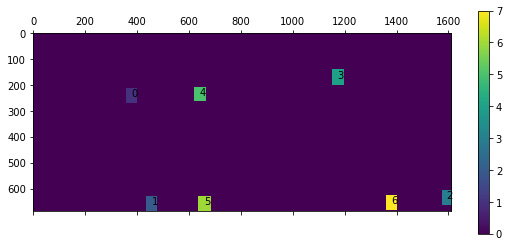

{0: ((356, 400, 215, 273), 2655),
 1: ((436, 478, 632, 687), 2408),
 2: ((1572, 1612, 608, 666), 2419),
 3: ((1149, 1197, 142, 205), 3136),
 4: ((618, 666, 211, 266), 2744),
 5: ((633, 684, 630, 688), 3068),
 6: ((1357, 1400, 628, 686), 2596)}

In [7]:
imze.list_regions()

Start with prozessing the first region , region 0

In [8]:
spectra0_orig = imze.get_region_array(0, makeNullLine=True)
spectra0_intra = imze.normalize_region_array(spectra0_orig, normalize="intra_median")
spectra0 = imze.normalize_region_array(spectra0_intra, normalize="inter_median")

Fetching region range
Fetching region shape
Found region 0 with shape (45, 59, 17900)
Fetching region spectra
100% |########################################################################|
100% |########################################################################|
Started Log Value: 0.14000733569264412
100% |########################################################################|
Got 2655 median-enabled pixels
5-Number stats for medians: (2655, 2655, 0.2905536462232088, 0.5712127712945096, 0.6654297160132764, 0.7571640240536153, 1.119313296797138)
Started Log Value: 0.21725614592432976
100% |########################################################################|
Got a total of 47524500 fold changes
Median elements [23762250]
Median elements
Global Median 0.64579


In [9]:
spectra1_orig = imze.get_region_array(1, makeNullLine=True)
spectra1_intra = imze.normalize_region_array(spectra1_orig, normalize="intra_median")
spectra1 = imze.normalize_region_array(spectra1_intra, normalize="inter_median")

Fetching region range
Fetching region shape
Found region 1 with shape (43, 56, 17900)
Fetching region spectra
100% |########################################################################|
100% |########################################################################|
Started Log Value: 0.17063884288072587
100% |########################################################################|
Got 2408 median-enabled pixels
5-Number stats for medians: (2408, 2408, 0.3039763115205163, 0.5889737648019792, 0.6580512343895084, 0.7246390240951075, 1.0161616910876121)
Started Log Value: 0.2648863598704338
100% |########################################################################|
Got a total of 43103200 fold changes
Median elements [21551600]
Median elements
Global Median 0.64556


Started Log Value: 0.14000733569264412


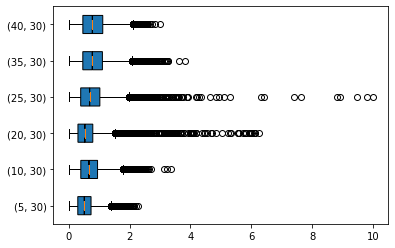

In [10]:
imze.plot_fcs(spectra0_orig, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

Started Log Value: 0.21725614592432976


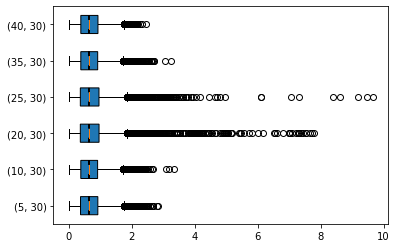

In [11]:
imze.plot_fcs(spectra0_intra, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

Started Log Value: 0.3364191856862599


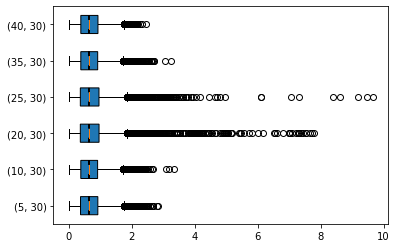

In [12]:
imze.plot_fcs(spectra0, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

Started Log Value: 0.17063884288072587


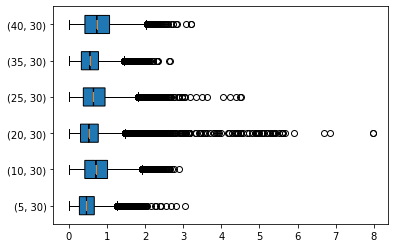

In [13]:
imze.plot_fcs(spectra1_orig, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

Started Log Value: 0.2648863598704338


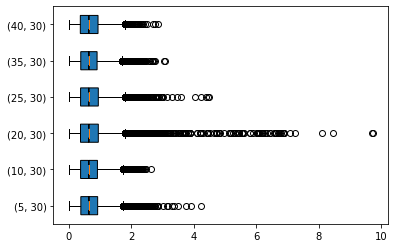

In [14]:
imze.plot_fcs(spectra1_intra, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

Started Log Value: 0.4103202798662151


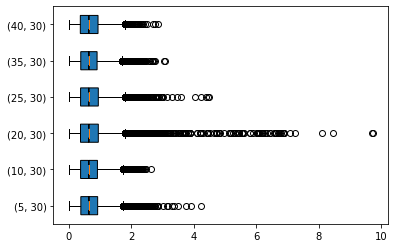

In [15]:
imze.plot_fcs(spectra1, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

We can now ensure that the normalized spectra are indeed comparable.

Where are the highest peaks? This may give a hint on whether or not a normalization by max intensity would also have worked. => here: most probably yes!

3454.87441091502 39
3456.383544128344 278
3457.8926773416683 2332
4965.516757452595 2
14980.124761072322 2
14981.633894285647 2


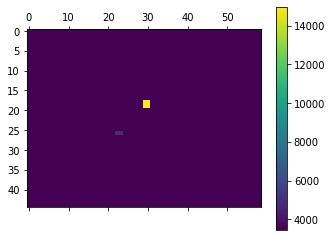

2655 45.060471276429595 282.8224196423905 133.18045036950951


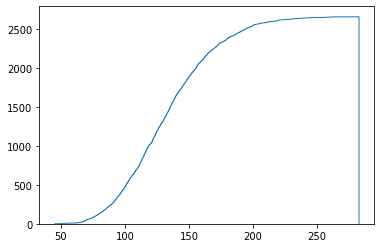

In [16]:
imze.list_highest_peaks(spectra0, counter=True)

Let's plot the norm of each spectrum

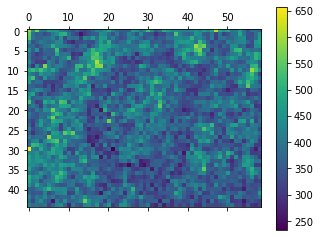

In [17]:
imze.plot_tnc(spectra0)

It can be seen that the norm of the spectra differs. However, given that intensities should be comparable, and that there was sample everywhere => just continue

In [18]:
spec = SpectraRegion(spectra0, imze.mzValues)

In [19]:
spec.calculate_similarity(mode="spectra_log")

2020-10-12 16:57:17,746  SpectraRegion  INFO: dimensions inputarray: 17900
2020-10-12 16:57:17,746  SpectraRegion  INFO: Creating C++ obj
2020-10-12 16:57:17,747  SpectraRegion  INFO: 17900 (45, 59, 17900)
2020-10-12 16:57:17,747  SpectraRegion  INFO: dimensions 17900
2020-10-12 16:57:17,748  SpectraRegion  INFO: input dimensions (45, 59, 17900)
2020-10-12 16:57:17,748  SpectraRegion  INFO: Switching to dot mode
2020-10-12 16:57:17,802  SpectraRegion  INFO: Starting calc similarity c++
2020-10-12 16:57:26,544  SpectraRegion  INFO: outclust dimensions (2655, 2655)
2020-10-12 16:57:26,546  SpectraRegion  INFO: Calculating spectra similarity
2020-10-12 16:57:26,584  SpectraRegion  INFO: Calculating spectra similarity done


array([[1.        , 0.97618073, 0.9691782 , ..., 0.83840245, 0.8406169 ,
        0.85142994],
       [0.97618073, 1.        , 0.98342717, ..., 0.88986284, 0.8919327 ,
        0.90145195],
       [0.9691782 , 0.98342717, 1.        , ..., 0.90628433, 0.9039524 ,
        0.91665334],
       ...,
       [0.83840245, 0.88986284, 0.90628433, ..., 1.        , 0.9589327 ,
        0.96420807],
       [0.8406169 , 0.8919327 , 0.9039524 , ..., 0.9589327 , 1.        ,
        0.9649949 ],
       [0.85142994, 0.90145195, 0.91665334, ..., 0.96420807, 0.9649949 ,
        1.        ]], dtype=float32)

There are various (unsupervised) clustering techniques. Like UMAP+HDBSCAN

In [20]:
spec.segment(method="UMAP_DBSCAN", number_of_regions=15, min_cluster_size=9, num_samples=1000)

2020-10-12 16:57:26,611  SpectraRegion  INFO: Calculating clusters
2020-10-12 16:57:26,612  SpectraRegion  INFO: Elem Matrix of shape: (2655, 17900)
2020-10-12 16:57:26,719  SpectraRegion  INFO: UMAP reduction
2020-10-12 16:57:50,971  SpectraRegion  INFO: HDBSCAN reduction
2020-10-12 16:57:50,972  SpectraRegion  INFO: HDBSCAN Clusterer with matrix (1000, 2)
2020-10-12 16:57:50,996  SpectraRegion  INFO: HDBSCAN Soft Clusters with matrix (2655, 2)
2020-10-12 16:57:51,297  SpectraRegion  INFO: HDBSCAN Soft Clusters as output matrix (2655, 20)
2020-10-12 16:57:51,298  SpectraRegion  INFO: HDBSCAN Soft Clusters: (2655, 20)
2020-10-12 16:57:51,299  SpectraRegion  INFO: HDBSCAN Labeling
2020-10-12 16:57:51,304  SpectraRegion  INFO: Cluster Reduction for UMAP Result
2020-10-12 16:57:51,305  SpectraRegion  INFO: Cluster Reduction
2020-10-12 16:57:51,305  SpectraRegion  INFO: Calculating consensus spectra
2020-10-12 16:57:51,335  SpectraRegion  INFO: Setting consensus spectra
2020-10-12 16:57:51

[[1.21036681e-37 3.22392546e-01 2.46994982e-01 ... 7.71585016e-36
  9.46326430e-36 1.13045636e-35]
 [2.51306289e-04 1.05701190e-01 1.67749100e-01 ... 9.96041446e-04
  1.22041306e-03 1.43401969e-03]
 [2.62141139e-02 1.02856329e-01 7.22697381e-02 ... 3.88365480e-02
  4.79822808e-02 5.90680617e-02]
 ...
 [3.55633295e-18 1.48033071e-16 1.67167342e-16 ... 1.33128020e-12
  1.30567130e-12 7.97656715e-13]
 [2.01671446e-03 3.98106911e-03 4.47165727e-03 ... 1.32909687e-01
  1.23339510e-01 7.83525911e-02]
 [6.40736823e-50 2.72280667e-48 3.09098088e-48 ... 1.22182425e-01
  1.25762562e-01 7.18628604e-02]]


array([[1, 1, 1, ..., 6, 6, 6],
       [1, 1, 8, ..., 2, 6, 5],
       [1, 1, 8, ..., 2, 6, 5],
       ...,
       [1, 1, 1, ..., 6, 6, 6],
       [1, 1, 1, ..., 6, 6, 2],
       [1, 8, 1, ..., 4, 2, 2]], dtype=int16)

In [21]:
spec.redo_hdbscan_on_dimred(number_of_regions=15, min_cluster_size=9, num_samples=500)

2020-10-12 16:57:51,441  SpectraRegion  INFO: HDBSCAN reduction
2020-10-12 16:57:51,442  SpectraRegion  INFO: HDBSCAN Clusterer with matrix (500, 2)
2020-10-12 16:57:51,455  SpectraRegion  INFO: HDBSCAN Soft Clusters with matrix (2655, 2)
2020-10-12 16:57:51,681  SpectraRegion  INFO: HDBSCAN Soft Clusters as output matrix (2655, 5)
2020-10-12 16:57:51,682  SpectraRegion  INFO: HDBSCAN Soft Clusters: (2655, 5)
2020-10-12 16:57:51,682  SpectraRegion  INFO: HDBSCAN Labeling


[[8.35941617e-02 6.28280044e-02 3.03481137e-02 3.03939200e-02
  3.37816450e-02]
 [8.16066672e-02 5.88036175e-02 2.87025141e-02 2.87803149e-02
  3.20068867e-02]
 [1.72192526e-01 2.41376620e-01 9.57678627e-02 9.57316659e-02
  1.06440952e-01]
 ...
 [3.18347712e-02 7.26722129e-01 7.95816755e-03 8.51545376e-03
  1.05842508e-02]
 [6.68005756e-06 8.88140886e-01 1.72209186e-06 1.85138835e-06
  2.31708541e-06]
 [1.47683187e-03 8.38784797e-01 3.61856960e-04 3.84867923e-04
  4.76778743e-04]]


In [22]:
len(spec.dimred_labels)

2655

2020-10-12 16:57:51,745  SpectraRegion  INFO: Pixels    : 2655
2020-10-12 16:57:51,746  SpectraRegion  INFO: Unassigned: 0


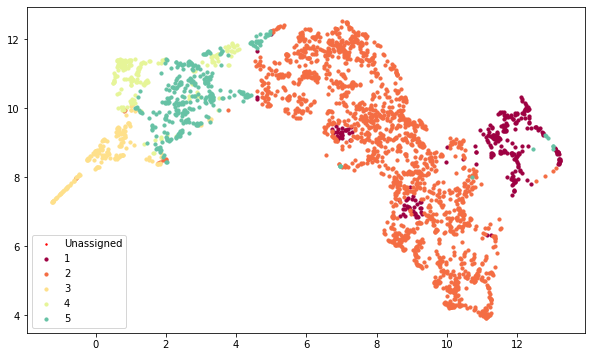

In [23]:
mpl.rcParams['figure.figsize'] = (10,6)
spec.vis_umap(legend=True)
mpl.rcParams['figure.figsize'] = (6,4)

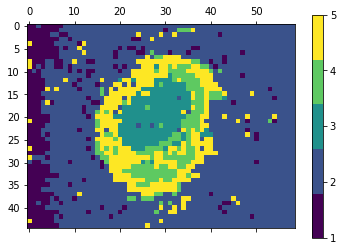

In [24]:
spec.plot_segments()

In [25]:
spec.filter_clusters(method='remove_singleton')
spec.filter_clusters(method='merge_background')
spec.filter_clusters(method='remove_islands')

2020-10-12 16:57:52,017  SpectraRegion  INFO: Assigning clusters to background: {1, 2, 5}


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

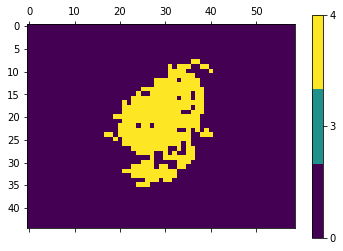

In [26]:
spec.plot_segments()

Which may or may not work well - more robustly, and maybe faster is a classic clustering of the similarity scores:

In [27]:
spec.segment(method="WARD", number_of_regions=15)

2020-10-12 16:57:52,151  SpectraRegion  INFO: Calculating clusters
2020-10-12 16:57:52,263  SpectraRegion  INFO: Calculating clusters done
2020-10-12 16:57:52,280  SpectraRegion  INFO: Calculating clusters saved


array([[6, 6, 6, ..., 2, 2, 4],
       [6, 6, 7, ..., 2, 4, 4],
       [6, 6, 7, ..., 1, 4, 4],
       ...,
       [6, 6, 6, ..., 4, 4, 4],
       [6, 6, 6, ..., 4, 4, 4],
       [6, 6, 7, ..., 4, 4, 4]], dtype=int16)

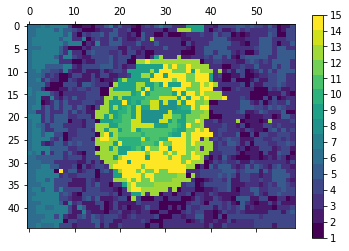

In [28]:
spec.plot_segments()

In [29]:
spec.filter_clusters(method='remove_singleton')
spec.filter_clusters(method='merge_background')
spec.filter_clusters(method='remove_islands')

2020-10-12 16:57:52,437  SpectraRegion  INFO: Assigning clusters to background: {1, 2, 3, 4, 5, 6, 7}


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

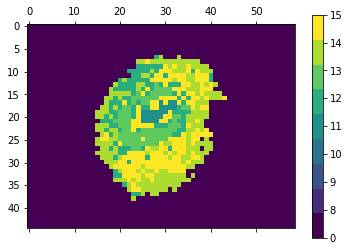

In [30]:
spec.plot_segments()

A manual curation of the segmentation is still possible!

In [31]:
spec.segmented[0:6,] = 0

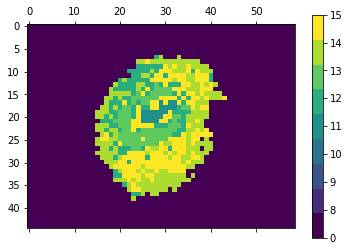

In [32]:
spec.plot_segments()

Consensus Analysis

In [ ]:
spec.consensus_spectra()

In [ ]:
spec.consensus_similarity()

In [ ]:
spec.plot_consensus_similarity()

In [ ]:
spec.plot_consensus_similarity(mode="spectra")

All clusters hare a 95% similarity in median. Cluster 0 (background) is the most heterogeneous one.

In [ ]:
#spec.plot_inter_consensus_similarity()

# Differential Analysis

One of the stand-alone features of pyIMS is the integration with differential expression analysis. Here several key-features are presented.

First, single masses are looked at:

In [ ]:
spec.mass_heatmap(14954, min_cut_off=0.0025)

The mass with m/z-value 14954 apparently is most active within the aorta structure (center of the image). Is this specific to a specific cluster

In [ ]:
dfobj = spec.mass_dabest(14954)

The DABEST-Plot also clearly reveals that in contrast to the background, cluster 8 intensity values for this mass are quite higher than for all other clusters.

Abviously this mass is most intense in Cluster 8, but also cluster 14. We can now take a look at this mass by setting cluster 14 as reference cluster

In [ ]:
spec.mass_dabest(14954, background=14)

Not knowing where this cluster 8 is, we can highlight it specifically:

In [ ]:
spec.plot_segments(highlight=8)

Or together with cluster 14, where this mass is also prevalent.

On a sidenote: background is set to 0, other regions == 1, and the target region is set to 2

In [ ]:
spec.plot_segments(highlight=[8,11])

Just for the sake of clarity: we now remove all differential expression results!

In [ ]:
spec.clear_de_results()

## Protein m/z to name

For any combination of sequencing results with these IMS analyses, knowing which protein was measured is of interest.

Using a previously performed LC-MS/MS experiment, which delivers detected proteins together with the masses, allows an easy translation of m/z values to protein name.
This work is done in the ProteinWeights object.

In [33]:
pw_theo = ProteinWeights("protein_weights.theo.tsv", max_mass=30010)

2020-10-12 17:24:55,489  ProteinWeights  INFO: Loaded a total of 7283 proteins with 10191 masses


In [34]:
pw_theo.print_collisions(print_proteins=False)

2020-10-12 17:24:58,617  ProteinWeights  INFO:          Number of total proteins: 7283
2020-10-12 17:24:58,618  ProteinWeights  INFO:            Number of total masses: 10191
2020-10-12 17:24:58,618  ProteinWeights  INFO: Number of proteins with collision: 6316
2020-10-12 17:24:58,620  ProteinWeights  INFO:         Mean Number of Collidings: 2.8738125395820138
2020-10-12 17:24:58,622  ProteinWeights  INFO:       Median Number of Collidings: 2.0
2020-10-12 17:24:58,623  ProteinWeights  INFO: Proteins with collision: [('Mbp', 30), ('Crem', 25), ('Homer1', 18), ('Clta', 18), ('Eif4e2', 18), ('U2af1l4', 16), ('Tspan32', 16), ('Tpd52', 16), ('Asph', 16), ('Hmga1', 15)]


In [35]:
pw_theo.print_collisions(maxdist=1.0, print_proteins=False)

2020-10-12 17:25:00,350  ProteinWeights  INFO:          Number of total proteins: 7283
2020-10-12 17:25:00,351  ProteinWeights  INFO:            Number of total masses: 10191
2020-10-12 17:25:00,351  ProteinWeights  INFO: Number of proteins with collision: 4881
2020-10-12 17:25:00,353  ProteinWeights  INFO:         Mean Number of Collidings: 1.9096496619545176
2020-10-12 17:25:00,354  ProteinWeights  INFO:       Median Number of Collidings: 2.0
2020-10-12 17:25:00,355  ProteinWeights  INFO: Proteins with collision: [('Mbp', 19), ('Spcs2', 11), ('Tpd52', 11), ('Erh', 10), ('Crem', 10), ('Vps25', 10), ('Ifi27', 10), ('Nudt7', 10), ('Clta', 10), ('Eif4e2', 10)]


With the m/z->protein object we can now find all marker masses for the 15 detected regions

For example we can also try to find out, which protein corresponds to mass 14954 ! (it's Ifitm3 ...)

In [36]:
pw_theo.get_protein_from_mass(14954)

[('Tnfrsf12a', 14952.97469999999), ('Ifitm3', 14954.185999999994)]

In [ ]:
for y in pw_theo.protein2mass:
    if not y.startswith(("Ccl", "Ccr", "Cxc", "Il")):
        continue
    for x in pw_theo.get_masses_for_protein(y):
        massprots = pw_theo.get_protein_from_mass(x)
        
        if len(massprots) <= 2:
            print(x, massprots)
            slided_0.mass_heatmap(x)
            

In [ ]:
slided_0.mass_heatmap(Ccl9)

Marker masses/proteins/genes are genes which are differentially regulated when compared to the specific cluster and all other clusters (including or excluding the background cluster).

Making the distinction regarding the background cluster might be required if the target tissue is embedded in another tissue. Excluding the background might then deliver more sensitive results.

In [37]:
mgenes = spec.find_all_markers(pw_theo, includeBackground=False,
                               replaceExisting=False,
                               outdirectory="./deresults/",
                               use_methods=["ttest", "rank"])

2020-10-12 17:25:02,225  SpectraRegion  INFO: DE data for case: [9]
2020-10-12 17:25:02,225  SpectraRegion  INFO: DE data for control: [13, 15, 12, 11, 10, 14, 8]
2020-10-12 17:25:02,226  SpectraRegion  INFO: Running [9] against [13, 15, 12, 11, 10, 14, 8]
2020-10-12 17:25:02,227  SpectraRegion  INFO: DE result key: ((9,), (8, 10, 11, 12, 13, 14, 15))
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
2020-1

2020-10-12 17:32:09,464  SpectraRegion  INFO: Fetching Mass Heatmaps for all 115 required masses


ttest ((9,), (8, 10, 11, 12, 13, 14, 15))


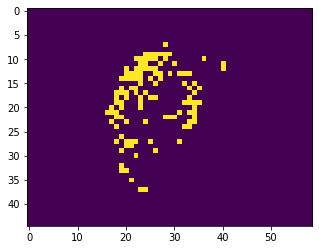

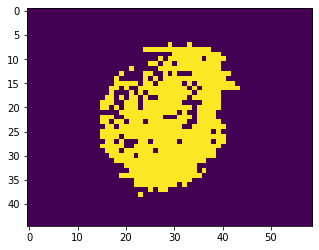

2020-10-12 17:32:23,626  SpectraRegion  INFO: Adding Mass Heatmap at pos 3 of 15 with 303 entries
2020-10-12 17:32:23,628  SpectraRegion  INFO: Got Columns: [('clusterID', '"string"'), ('gene_ident', '"string"'), ('gene_mass', '"number"'), ('Mass Heatmap', '"string"'), ('gene', '"string"'), ('protein_mass', '"number"'), ('avg_logFC', '"number"'), ('qvalue', '"number"'), ('num', '"number"'), ('anum', '"number"'), ('mean', '"number"'), ('median', '"number"'), ('num_bg', '"number"'), ('anum_bg', '"number"'), ('mean_bg', '"number"'), ('median_bg', '"number"')]
2020-10-12 17:32:24,214  SpectraRegion  INFO: copy tablefilter files from ../pIMZ/tablefilter to ./deresults/tablefilter
2020-10-12 17:32:25,619  SpectraRegion  INFO: Fetching Mass Heatmaps for all 510 required masses


ttest ((13,), (8, 9, 10, 11, 12, 14, 15))


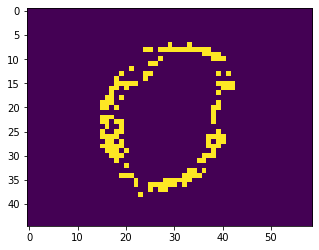

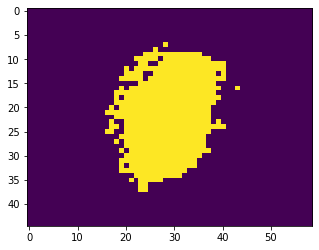

2020-10-12 17:33:15,956  SpectraRegion  INFO: Adding Mass Heatmap at pos 3 of 15 with 1247 entries
2020-10-12 17:33:15,957  SpectraRegion  INFO: Got Columns: [('clusterID', '"string"'), ('gene_ident', '"string"'), ('gene_mass', '"number"'), ('Mass Heatmap', '"string"'), ('gene', '"string"'), ('protein_mass', '"number"'), ('avg_logFC', '"number"'), ('qvalue', '"number"'), ('num', '"number"'), ('anum', '"number"'), ('mean', '"number"'), ('median', '"number"'), ('num_bg', '"number"'), ('anum_bg', '"number"'), ('mean_bg', '"number"'), ('median_bg', '"number"')]
2020-10-12 17:33:17,897  SpectraRegion  INFO: copy tablefilter files from ../pIMZ/tablefilter to ./deresults/tablefilter
2020-10-12 17:33:19,281  SpectraRegion  INFO: Fetching Mass Heatmaps for all 171 required masses


ttest ((15,), (8, 9, 10, 11, 12, 13, 14))


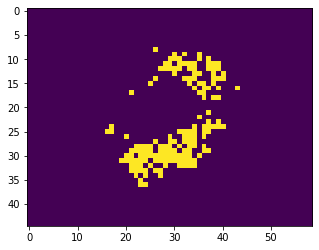

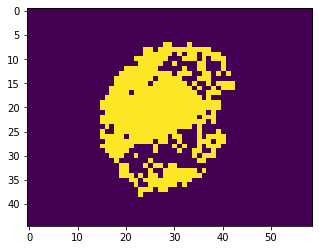

2020-10-12 17:33:39,344  SpectraRegion  INFO: Adding Mass Heatmap at pos 3 of 15 with 433 entries
2020-10-12 17:33:39,345  SpectraRegion  INFO: Got Columns: [('clusterID', '"string"'), ('gene_ident', '"string"'), ('gene_mass', '"number"'), ('Mass Heatmap', '"string"'), ('gene', '"string"'), ('protein_mass', '"number"'), ('avg_logFC', '"number"'), ('qvalue', '"number"'), ('num', '"number"'), ('anum', '"number"'), ('mean', '"number"'), ('median', '"number"'), ('num_bg', '"number"'), ('anum_bg', '"number"'), ('mean_bg', '"number"'), ('median_bg', '"number"')]
2020-10-12 17:33:40,176  SpectraRegion  INFO: copy tablefilter files from ../pIMZ/tablefilter to ./deresults/tablefilter
2020-10-12 17:33:41,619  SpectraRegion  INFO: Fetching Mass Heatmaps for all 582 required masses


ttest ((12,), (8, 9, 10, 11, 13, 14, 15))


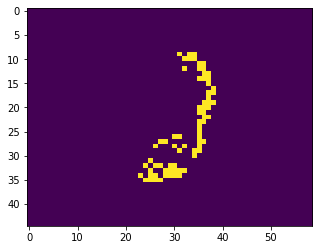

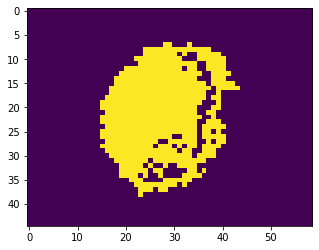

2020-10-12 17:34:37,084  SpectraRegion  INFO: Adding Mass Heatmap at pos 3 of 15 with 1450 entries
2020-10-12 17:34:37,085  SpectraRegion  INFO: Got Columns: [('clusterID', '"string"'), ('gene_ident', '"string"'), ('gene_mass', '"number"'), ('Mass Heatmap', '"string"'), ('gene', '"string"'), ('protein_mass', '"number"'), ('avg_logFC', '"number"'), ('qvalue', '"number"'), ('num', '"number"'), ('anum', '"number"'), ('mean', '"number"'), ('median', '"number"'), ('num_bg', '"number"'), ('anum_bg', '"number"'), ('mean_bg', '"number"'), ('median_bg', '"number"')]
2020-10-12 17:34:39,080  SpectraRegion  INFO: copy tablefilter files from ../pIMZ/tablefilter to ./deresults/tablefilter
2020-10-12 17:34:40,503  SpectraRegion  INFO: Fetching Mass Heatmaps for all 1006 required masses


ttest ((11,), (8, 9, 10, 12, 13, 14, 15))


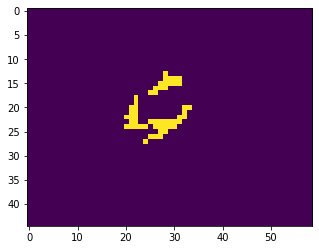

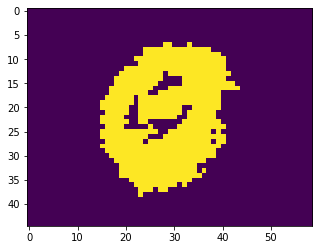

2020-10-12 17:36:06,929  SpectraRegion  INFO: Adding Mass Heatmap at pos 3 of 15 with 2264 entries
2020-10-12 17:36:06,931  SpectraRegion  INFO: Got Columns: [('clusterID', '"string"'), ('gene_ident', '"string"'), ('gene_mass', '"number"'), ('Mass Heatmap', '"string"'), ('gene', '"string"'), ('protein_mass', '"number"'), ('avg_logFC', '"number"'), ('qvalue', '"number"'), ('num', '"number"'), ('anum', '"number"'), ('mean', '"number"'), ('median', '"number"'), ('num_bg', '"number"'), ('anum_bg', '"number"'), ('mean_bg', '"number"'), ('median_bg', '"number"')]
2020-10-12 17:36:09,165  SpectraRegion  INFO: copy tablefilter files from ../pIMZ/tablefilter to ./deresults/tablefilter
2020-10-12 17:36:10,767  SpectraRegion  INFO: Fetching Mass Heatmaps for all 243 required masses


ttest ((10,), (8, 9, 11, 12, 13, 14, 15))


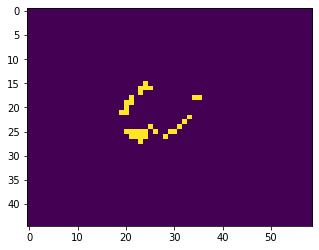

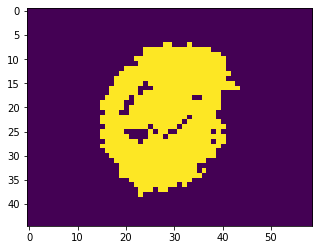

2020-10-12 17:36:35,165  SpectraRegion  INFO: Adding Mass Heatmap at pos 3 of 15 with 610 entries
2020-10-12 17:36:35,167  SpectraRegion  INFO: Got Columns: [('clusterID', '"string"'), ('gene_ident', '"string"'), ('gene_mass', '"number"'), ('Mass Heatmap', '"string"'), ('gene', '"string"'), ('protein_mass', '"number"'), ('avg_logFC', '"number"'), ('qvalue', '"number"'), ('num', '"number"'), ('anum', '"number"'), ('mean', '"number"'), ('median', '"number"'), ('num_bg', '"number"'), ('anum_bg', '"number"'), ('mean_bg', '"number"'), ('median_bg', '"number"')]
2020-10-12 17:36:36,277  SpectraRegion  INFO: copy tablefilter files from ../pIMZ/tablefilter to ./deresults/tablefilter
2020-10-12 17:36:37,607  SpectraRegion  INFO: Fetching Mass Heatmaps for all 588 required masses


ttest ((14,), (8, 9, 10, 11, 12, 13, 15))


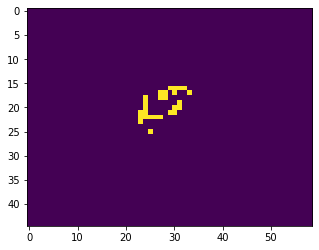

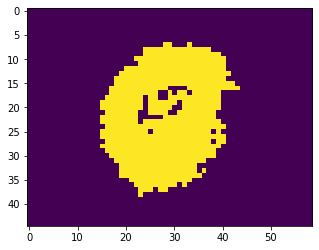

2020-10-12 17:37:29,154  SpectraRegion  INFO: Adding Mass Heatmap at pos 3 of 15 with 1521 entries
2020-10-12 17:37:29,155  SpectraRegion  INFO: Got Columns: [('clusterID', '"string"'), ('gene_ident', '"string"'), ('gene_mass', '"number"'), ('Mass Heatmap', '"string"'), ('gene', '"string"'), ('protein_mass', '"number"'), ('avg_logFC', '"number"'), ('qvalue', '"number"'), ('num', '"number"'), ('anum', '"number"'), ('mean', '"number"'), ('median', '"number"'), ('num_bg', '"number"'), ('anum_bg', '"number"'), ('mean_bg', '"number"'), ('median_bg', '"number"')]
2020-10-12 17:37:31,092  SpectraRegion  INFO: copy tablefilter files from ../pIMZ/tablefilter to ./deresults/tablefilter
2020-10-12 17:37:32,455  SpectraRegion  INFO: Fetching Mass Heatmaps for all 1592 required masses


ttest ((8,), (9, 10, 11, 12, 13, 14, 15))


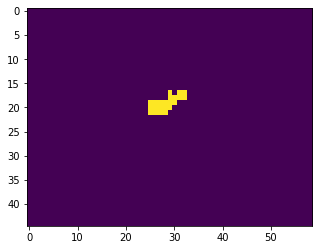

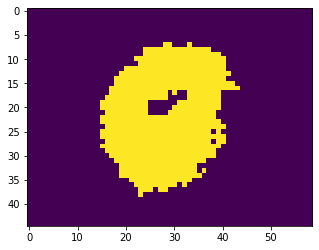

2020-10-12 17:39:46,111  SpectraRegion  INFO: Adding Mass Heatmap at pos 3 of 15 with 3953 entries
2020-10-12 17:39:46,113  SpectraRegion  INFO: Got Columns: [('clusterID', '"string"'), ('gene_ident', '"string"'), ('gene_mass', '"number"'), ('Mass Heatmap', '"string"'), ('gene', '"string"'), ('protein_mass', '"number"'), ('avg_logFC', '"number"'), ('qvalue', '"number"'), ('num', '"number"'), ('anum', '"number"'), ('mean', '"number"'), ('median', '"number"'), ('num_bg', '"number"'), ('anum_bg', '"number"'), ('mean_bg', '"number"'), ('median_bg', '"number"')]
2020-10-12 17:39:48,567  SpectraRegion  INFO: copy tablefilter files from ../pIMZ/tablefilter to ./deresults/tablefilter


In [43]:
for x in spec.df_results_all:
    for y in spec.df_results_all[x]:
        if x != "ttest":
            continue
        
        print(x,y)
        
        
        spec.export_deres(x, y, "./deresults/deres.{}.{}.html".format("_".join([str(j) for j in y[0]]), "_".join([str(j) for j in y[1]])))
        

In [ ]:
spec.df_results_all["ttest"][((9,), (8, 10, 11, 12, 13, 14, 15))]

In [ ]:


from skimage import measure


# Construct some test data
x, y = np.ogrid[-np.pi:np.pi:100j, -np.pi:np.pi:100j]
r = np.sin(np.exp((np.sin(x)**3 + np.cos(y)**2)))


ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()


In [ ]:
mgenes["ttest"]

In [ ]:
mgenes_bg = spec.find_all_markers(pw_theo, includeBackground=True, replaceExisting=False, use_methods = ["ttest", "rank"])

After both find_all_markers runs we can list all DE results, which are then printed.
Each row shows one contained DE results beginning with the test performed and then a tuple of two region/cluster IDs. In the first row here:

a t-test was performed on cluster 9 versus clusters 8,10,11,12,13,14,15 .

In [ ]:
spec.list_de_results()

It's also easy to save the result to disk:

In [ ]:
markerGenes = mgenes["ttest"]
markerGenes.to_csv("deresults/marker_genes.tsv", sep="\t", index=False)

In [ ]:
markerGenesBG = mgenes_bg["ttest"]
markerGenesBG.to_csv("deresults/marker_genes_bg.tsv", sep="\t", index=False)

In [ ]:
print("Number of unique, differentially detected proteins (from masses): {}".format(len(set(mgenes["ttest"]["gene"]))))

In [ ]:
print("Number of unique, differentially detected proteins (from masses): {}".format(len(set(mgenes_bg["ttest"]["gene"]))))

In order to save the results, the SpectraRegion object can be pickled:

In [ ]:
with open("slideD_region_0.spec.pickle", "wb") as fout:
    pickle.dump(spec, fout)

# Cell-type detection

Cell-type detection requires analyseMarkers.py from https://github.com/mjoppich/scrnaseq_celltype_prediction .

One (obvious) question is: what can I do with those marker proteins? Well, a lot!

First, these are the proteins which you are interested in: these define your clusters, because they are present.

Second, these proteins give a clue about which cell types might be present, if cell-type specific genes were found.

Using the scrnaseq-celltype-prediction tool, this can be analysed! Let's download it first (requires wget, python3 and several other libraries - maybe).
Did you know? This tool achieves better predictions than SingleR :)

Because we know what kind of sample we got (aorta embedded in liver), we can specify organs to specifically check for cell types.
Organs to be considered are "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" "Liver".
This allows a context-specific evaluation!

In [ ]:
! ls analyseMarkers.py

In [ ]:
! wget https://raw.githubusercontent.com/mjoppich/scrnaseq_celltype_prediction/master/analyseMarkers.py

In [ ]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" "Liver" --pvaladj qvalue --markers deresults/marker_genes.tsv -n 2

This is quite interesting. For cluster 8 this tool predicts mainly monocytes or gamma delta t cells - cells which do not migrate into other tissues.

This makes sense, because one would expect these cell-types in the inner of the vessel.

H2AFX is known to be upregulated in lymphoblasts (check wikipedia ;) ).
Ifitm3 is highly expressed in both, Liver and Monocytes: https://www.proteinatlas.org/ENSG00000142089-IFITM3/tissue (Consensus dataset)

In [ ]:
spec.plot_segments(highlight=(8))

In [ ]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" "Liver" --pvaladj qvalue --markers deresults/marker_genes_bg.tsv -n 2

In this analysis, the background was kept in. More differential genes are found, but also more liver-related cell types are found.

This suggests that the analysis which includes the liver background has influenced the found differential proteins too much.

Nonetheless, the results remain consistent. For cluster 8, the missing monocytes are replaced by hepatocytes, which are monocyte-like cells residing in the liver.

Cluster 9 showing high amounds of cardiomyocytes is also not unlikely, given its location at the outer area of the aorta.

In [ ]:
spec.plot_segments(highlight=(9))

Finally the SpectraRegion can also be exported to Aorta3D.

In [ ]:
#spec.to_aorta3d("./slided_test/", "slided", 0, protWeights=pw, nodf=False, pathPrefix="../data/test_msi/")

In [ ]:
!ls slided_test

# Preparations for CombinedSpectra - A comparative analysis

In [ ]:
spectra1 = imze.get_region_array(1, makeNullLine=True)
imze.normalize_region_array(spectra1, normalize="vector")
imze.list_highest_peaks(spectra1, counter=True)
print("Got spectra", spectra1.shape)

spec1 = SpectraRegion(spectra1, imze.mzValues)
spec1.calculate_similarity(mode="spectra_log_dist")
spec1.segment(method="WARD", number_of_regions=15)
spec1.plot_segments()

So far the results were only for one IMS sample.

Now the idea is to integrate multiple samples, in order to compare the different samples which were measured on the same slide.

Hence the remaining samples are processed, all in the same fashion. With the inter and intro normalization, the sample are made comparable.

In [ ]:
pw = ProteinWeights("protein_weights.tsv")

def process_imzeregion(imze, regionID, basename):
    
    print("Processing regionID", regionID, "for basename", basename)
    
    spectra_orig = imze.get_region_array(regionID, makeNullLine=True)
    spectra_intra = imze.normalize_region_array(spectra_orig, normalize="intra_median")
    spectra = imze.normalize_region_array(spectra_intra, normalize="inter_median")
    
    rspec = SpectraRegion(spectra, imze.mzValues, name=basename + "_" + str(regionID))
    rspec.calculate_similarity(mode="spectra_log_dist")
    rspec.segment(method="WARD", number_of_regions=15)
    rspec.plot_segments()
    
    rspec.filter_clusters(method='remove_singleton')
    rspec.filter_clusters(method='merge_background')
    rspec.filter_clusters(method='remove_islands')
    rspec.filter_clusters(method='remove_islands', minIslandSize=15)
    rspec.plot_segments()
    
    #rspec.consensus_spectra()
    #rspec.consensus_similarity()
    #rspec.plot_consensus_similarity()
    
    mgenes = None
    mgenes_bg = None
    mgenes = rspec.find_all_markers(pw, includeBackground=False, replaceExisting=False, use_methods = ["ttest", "rank"])
    mgenes_bg = rspec.find_all_markers(pw, includeBackground=True, replaceExisting=False, use_methods = ["ttest", "rank"])
    
    return rspec, mgenes, mgenes_bg
    

First set the logging level to warn, to remove too many messages ...

In [ ]:
#loggers = [logging.getLogger(name) for name in logging.root.manager.loggerDict]
#for logger in loggers:
#    logger.setLevel(logging.WARN)

In [ ]:
slided_0, slided0_mgenes, slided0_mgenes_bg = process_imzeregion(imze=imze, regionID= 0, basename="slideD")
slided_1, slided1_mgenes, slided1_mgenes_bg = process_imzeregion(imze=imze, regionID= 1, basename="slideD")

In [ ]:
slided_0.mass_dabest(pw.protein2mass.get("Tmsb4x"))

In [ ]:
slided_1.mass_dabest(pw.protein2mass.get("Tmsb4x"))

In [ ]:
slided_4, slided4_mgenes, slided4_mgenes_bg = process_imzeregion(imze=imze, regionID= 4, basename="slideD")
slided_5, slided5_mgenes, slided5_mgenes_bg = process_imzeregion(imze=imze, regionID= 5, basename="slideD")

In [ ]:
#loggers = [logging.getLogger(name) for name in logging.root.manager.loggerDict]
#for logger in loggers:
#    logger.setLevel(logging.INFO)

In [ ]:
markerGenes0 = slided0_mgenes["ttest"]
markerGenes0.to_csv("deresults/marker_genes_region_0.tsv", sep="\t", index=False)
markerGenes1 = slided1_mgenes["ttest"]
markerGenes1.to_csv("deresults/marker_genes_region_1.tsv", sep="\t", index=False)
markerGenes4 = slided4_mgenes["ttest"]
markerGenes4.to_csv("deresults/marker_genes_region_4.tsv", sep="\t", index=False)
markerGenes5 = slided5_mgenes["ttest"]
markerGenes5.to_csv("deresults/marker_genes_region_5.tsv", sep="\t", index=False)


In [ ]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_0.tsv --aorta3d --output deresults/marker_genes_region_0.pred.tsv 
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_1.tsv --aorta3d --output deresults/marker_genes_region_1.pred.tsv 
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_4.tsv --aorta3d --output deresults/marker_genes_region_4.pred.tsv 
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_5.tsv --aorta3d --output deresults/marker_genes_region_5.pred.tsv 

In [ ]:
slided_0.to_aorta3d("./aorta3d/slided/", "slided", 0, protWeights=pw, ctpred="deresults/marker_genes_region_0.pred.tsv")
slided_1.to_aorta3d("./aorta3d/slided/", "slided", 1, protWeights=pw, ctpred="deresults/marker_genes_region_1.pred.tsv")
slided_4.to_aorta3d("./aorta3d/slided/", "slided", 4, protWeights=pw, ctpred="deresults/marker_genes_region_4.pred.tsv")
slided_5.to_aorta3d("./aorta3d/slided/", "slided", 5, protWeights=pw, ctpred="deresults/marker_genes_region_5.pred.tsv")

In [ ]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_0.tsv -n 2

In [ ]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_1.tsv -n 2

In [ ]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_4.tsv -n 2

In [ ]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_5.tsv -n 2

From these cell type predictions it can be seen that mostly atherosclerosis relates cell types are showing up.

# Creating a CombinedSpectra

In [ ]:
slided_0.name = "slided_0"
slided_1.name = "slided_1"
slided_4.name = "slided_4"
slided_5.name = "slided_5"

In [ ]:
#slided_0 = SpectraRegion.from_pickle("slideD_region_0.pickle")
#slided_1 = SpectraRegion.from_pickle("slideD_region_1.pickle")
#slided_4 = SpectraRegion.from_pickle("slideD_region_4.pickle")
#slided_5 = SpectraRegion.from_pickle("slideD_region_5pickle")

Of course a SpectraRegion can also be re-processed to yield a more realistic clustering.

In [ ]:
slided_1.segment(method="WPGMA", number_of_regions=15)
slided_1.plot_segments()

slided_1.filter_clusters(method='remove_singleton')
slided_1.filter_clusters(method='merge_background')
slided_1.filter_clusters(method='remove_islands')
slided_1.filter_clusters(method='remove_islands', minIslandSize=15)



slided_1.plot_segments()

In [ ]:
mask = slided_1.segmented == 8
mask[0:22,: ] = False
mask[:,0:22 ] = False
slided_1.segmented[mask] = 15
slided_1.plot_segments()
slided_1.plot_segments(highlight=[15])

In [ ]:
slided_5.segment(method="WPGMA", number_of_regions=15)
slided_5.plot_segments()

slided_5.filter_clusters(method='remove_singleton')
slided_5.filter_clusters(method='merge_background')
slided_5.filter_clusters(method='remove_islands')
slided_5.filter_clusters(method='remove_islands', minIslandSize=15)
slided_5.plot_segments()

In [ ]:
slided_0.to_pickle("deresults/slideD_region_0.pickle")
slided_1.to_pickle("deresults/slideD_region_1.pickle")

In [ ]:
slided_4.to_pickle("deresults/slideD_region_4.pickle")
slided_5.to_pickle("deresults/slideD_region_5.pickle")

In [ ]:
slided_0.to_aorta3d("./aorta3d/slided/", "slided", 0, protWeights=pw, ctpred="deresults/marker_genes_region_0.pred.tsv")
slided_1.to_aorta3d("./aorta3d/slided/", "slided", 1, protWeights=pw, ctpred="deresults/marker_genes_region_1.pred.tsv")
slided_4.to_aorta3d("./aorta3d/slided/", "slided", 4, protWeights=pw, ctpred="deresults/marker_genes_region_4.pred.tsv")
slided_5.to_aorta3d("./aorta3d/slided/", "slided", 5, protWeights=pw, ctpred="deresults/marker_genes_region_5.pred.tsv")

In [ ]:
! python3 /mnt/f/dev/git/Aorta3D/files2model/register/register_pimz.py --id slided \
--files \
/mnt/f/dev/git/pyIMS/examples/aorta3d/slided/slided.1.info \
/mnt/f/dev/git/pyIMS/examples/aorta3d/slided/slided.0.info \
/mnt/f/dev/git/pyIMS/examples/aorta3d/slided/slided.4.info \
/mnt/f/dev/git/pyIMS/examples/aorta3d/slided/slided.5.info \
--output /mnt/f/dev/git/pyIMS/examples/aorta3d/slided/registered/slided_server.conf

Here a CombinedSpectra is creates. This class allows to compare multiple SpectraRegions

In [ ]:
combSpec = CombinedSpectra({0: slided_0, 1: slided_1, 4: slided_4, 5: slided_5})

The consensus_smilarity() function calculates the similarity between all the contained spectra's regions using the average cluster/region spectra.

In [ ]:
combSpec.consensus_similarity()

In [ ]:
combSpec.consensus_similarity_matrix

Since the inspection of this matrix becomes tidious, particularly if large, it an be plotted :)

In [ ]:
combSpec.plot_consensus_similarity()

It can already be seen that some classes are more similar to each other, than others.

Now the single slide/region clusters are reclustered.

In [ ]:
combSpec.cluster_concensus_spectra(number_of_clusters=10)

A detailed print out of the newly assigned cluster for each slide, region.

In [ ]:
combSpec.region_cluster2cluster

The new assignment can also be plotted:

In [ ]:
combSpec.plot_common_segments()

And of course, interpreted.

Slide 1 and Slide 5 appear to be similar, and slide 0 and slide 4.



In [ ]:
combSpec.plot_common_segments(highlight=(4))

Similar to a normal SpectraRegion, also specific masses can be plotted. Here we can see that mass 14954 is not present in slides 1 and 5!

In [ ]:
_ = combSpec.mass_heatmap(14954)

## A first DE Analysis: Tunica Media

Slide 0 cluster 2 and slide 4 cluster 1 seem to be very similar. We now want to see whether some differences can be observed.

For this, we suspect that slides 0 and 4 are disease-samples, and slides 1 and 5 are controls.

We now compare the outer regions of both samples:

In [ ]:
combSpec.regions["slided_0"].plot_segments(highlight=[8,9])
combSpec.regions["slided_1"].plot_segments(highlight=[12,14])

In [ ]:
combSpec.get_internormed_regions()

In [ ]:
print(np.median(combSpec.region_array_scaled["slided_1"]), np.median( combSpec.regions["slided_1"].region_array))

In [ ]:
combSpec.mass_intensity(14954, regions=["slided_0", "slided_1"], scaled=False)

In [ ]:
combSpec.mass_intensity(14954, regions=["slided_0", "slided_1"], scaled=True)

In [ ]:
resdf, expr, pdata = combSpec.find_markers("slided_0", [8,9], "slided_1", [12,14], pw, scaled=True)

In [ ]:
combSpec.list_de_results()

In [ ]:
mydf = resdf["ttest"][('slided_0', (8,9,), 'slided_1', (12,14,))]

In order to plot a volcano plot for the differential masses/proteins, the result DF is subset to only have masses displayed that have a mean intensity of at least 2.

In [ ]:
from adjustText import adjust_text

In [ ]:
pd.set_option('display.max_rows', None)
mydf

In [ ]:
plt.figure(figsize=(16,10))
xydots = [(x,y) for x,y in zip(list(-mydf["avg_logFC"]), list(-np.log10(mydf["qvalue"])))]
dotgene = list(mydf["gene"])
texts = []
seenProts = set()

for i in range(len(xydots)):
    x = xydots[i][0]
    y = xydots[i][1]
    
    if not dotgene[i] in seenProts and abs(y) >= 10 and abs(x) >= 0.5:
        texts.append(plt.text(x * (1 + 0.01), y * (1 + 0.01) , dotgene[i], fontsize=12))
        plt.plot(x, y, 'ro')
        seenProts.add(dotgene[i])
    else:
        plt.plot(x, y, 'bo')

adjust_text(texts, force_points=0.2, force_text=0.2, expand_points=(1, 1), expand_text=(1, 1), arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
plt.show()

![title](https://medicalartlibrary.com/wp-content/uploads/atherosclerosis-renal.jpg)

In this comparison the tunica media of atherosclerotic (slided_0) and control (slided_1) aorta was compared.
It must be noted, that the selected regions are considerably thicker in slided_1 compared to slided_0, but it is a known phenomenon that "The media underlying intimal athero- sclerotic plaque is considerably thinner" (Milutinović, A., Šuput, D., & Zorc-Pleskovič, R. (2020). Pathogenesis of atherosclerosis in the tunica intima, media, and adventitia of coronary arteries: An updated review. In Bosnian Journal of Basic Medical Sciences (Vol. 20, Issue 1, pp. 21–30). Association of Basic Medical Sciences of FBIH. https://doi.org/10.17305/bjbms.2019.4320 ).

However, due to the proximity to the background tissue (liver), for each mass it should be checked whether this mass is not also prevalent in the background tissue and therefore is present in the cluster due to diffusion, bad clustering, or other reasons. The mass_heatmap-function give a good and fast overview!

#### Tmsb4x -
First it is very interesting to see a difference in Tmsb4x between the (suspected) control and disease aortas.
The diseased-aorta-media has significantly less Tmsb4x (-0.5).
This is not surprising, but was already found 5 years ago ( Zaima, N., Sasaki, T., Tanaka, H., Cheng, X. W., Onoue, K., Hayasaka, T., Goto-Inoue, N., Enomoto, H., Unno, N., Kuzuya, M., & Setou, M. (2011). Imaging mass spectrometry-based histopathologic examination of atherosclerotic lesions. Atherosclerosis, 217(2), 427–432. https://doi.org/10.1016/j.atherosclerosis.2011.03.044 ). Indeed, this can be seen as proof-of-concept.

#### Ptges3 +

On the contrary, there are other proteins, which are up-regulated in the atherosclerotic aorta.
Among these is Ptges3 (+1.25), which was shown to be involved in the inflammatory response of bovine endometrial epithelial cells.
Almughlliq, F. B., Koh, Y. Q., Peiris, H. N., Vaswani, K., Arachchige, B. J., Reed, S., & Mitchell, M. D. (2018). Eicosanoid pathway expression in bovine endometrial epithelial and stromal cells in response to lipopolysaccharide, interleukin 1 beta, and tumor necrosis factor alpha. Reproductive Biology, 18(4), 390–396. https://doi.org/10.1016/j.repbio.2018.10.001

Further proteins of interest include

#### Chchd4 +
Chchd4 was already identified as a biomarker for chronic obstructive pulmonary disease (COPD), a chronic inflammatory disease - in such, maybe? comparable to atherosclerosis.
Chchd4 affects the mitochondrial metabolism, being named in the p53-axis controlling tumor proliferation.

Maghsoudloo, M., Azimzadeh Jamalkandi, S., Najafi, A., & Masoudi-Nejad, A. (2020). An efficient hybrid feature selection method to identify potential biomarkers in common chronic lung inflammatory diseases. Genomics, 112(5), 3284–3293. https://doi.org/10.1016/j.ygeno.2020.06.010

#### Coa6 --

The respiratory metabolism appears to play an important role in atherosclerosis. Many regulated proteins fall into this category.
A Coa6 deficiency is known to be causing many disease phenotypes, including cardiomyopathy, encephalomyopathy, skeletal muscle myopathy, Leigh syndrome, metabolic acidosis and occasional hepatic failure.
In summary: Coa6 deficiency does not contribute to a healthy Aorta.

Ghosh, A., Trivedi, P. P., Timbalia, S. A., Griffin, A. T., Rahn, J. J., Chan, S. S. L., & Gohil, V. M. (2014). Copper supplementation restores cytochrome c oxidase assembly defect in a mitochondrial disease model of COA6 deficiency. Human Molecular Genetics, 23(13), 3596–3606. https://doi.org/10.1093/hmg/ddu069

#### Cst3 +

Serum Cystein3 is associated with subclinical atherosclerosis, which can also be seen in the middle of the IMS aorta. It also does not seem unlikely, that Cst3 is elsewhere upregulated in atherosclerotic aorta.

Chung, Y. K., Lee, Y. J., Kim, K. W., Cho, R. K., Chung, S. M., Moon, J. S., Yoon, J. S., Won, K. C., & Lee, H. W. (2018). Serum cystatin C is associated with subclinical atherosclerosis in patients with type 2 diabetes: A retrospective study. Diabetes and Vascular Disease Research, 15(1), 24–30. https://doi.org/10.1177/1479164117738156

#### Ndufa11 +, Cox7a2 -

This proteins is of interesting, and together with other identified proteins ( like Cox7a2 ), is part of the mitochondria.
Atherosclerosis therefore might have an effect on the energy metabolism, similar to an ischemic stroke: James, R., Searcy, J. L., Le Bihan, T., Martin, S. F., Gliddon, C. M., Povey, J., Deighton, R. F., Kerr, L. E., McCulloch, J., & Horsburgh, K. (2012). Proteomic analysis of mitochondria in APOE transgenic mice and in response to an ischemic challenge. Journal of Cerebral Blood Flow and Metabolism, 32(1), 164–176. https://doi.org/10.1038/jcbfm.2011.120 

#### Ndufb6 +

Ndufb6 was identified to being critical for the development of PM2.5-induced fibrosis in mouse lungs. Therefore it is likely related to inflammatory processes.

Han, X., Liu, H., Zhang, Z., Yang, W., Wu, C., Liu, X., Zhang, F., Sun, B., Zhao, Y., Jiang, G., Yang, Y. G., & Ding, W. (2020). Epitranscriptomic 5-Methylcytosine Profile in PM2.5-induced Mouse Pulmonary Fibrosis. Genomics, Proteomics and Bioinformatics, 18(1), 41–51. https://doi.org/10.1016/j.gpb.2019.11.005



In [ ]:
_ = combSpec.mass_heatmap(pw.protein2mass.get("Tmsb4x"), scaled=True)

In [ ]:
combSpec.mass_intensity(pw.protein2mass.get("Tmsb4x"), regions=["slided_0", "slided_1"], scaled=True)

In [ ]:
for gene in np.unique(mydf["gene"]):
    print(gene)
    _ = combSpec.mass_heatmap(pw.protein2mass.get(gene), scaled=True)

In [ ]:
combSpec.mass_intensity(pw.protein2mass.get("Ptges3"), regions=["slided_0", "slided_1"], scaled=True)

## Another DE Analysis: whole Aorta

Having spotted several differences between the Tunica media of atherosclerotic and suspected healthy aorta, a full comparison might also be of interest.

For this, all slided_0 and slided_1 regions are compared  - with the exception of the backgrounds.

In [ ]:
slided_0_regions = tuple(sorted([x for x in np.unique(slided_0.segmented) if x > 0]))
slided_1_regions = tuple(sorted([x for x in np.unique(slided_1.segmented) if x > 0]))

In [ ]:
combSpec.regions["slided_0"].plot_segments(highlight=slided_0_regions)
combSpec.regions["slided_1"].plot_segments(highlight=slided_1_regions)

In [ ]:
resdf_all, expr, pdata = combSpec.find_markers("slided_0", slided_0_regions, "slided_1", slided_1_regions, pw, scaled=True)

In [ ]:
combSpec.list_de_results()

In [ ]:
mydf_all = resdf_all["ttest"][('slided_0', slided_0_regions, 'slided_1', slided_1_regions)]

In [ ]:
plt.figure(figsize=(16,10))
xydots = [(x,y) for x,y in zip(list(-mydf_all["avg_logFC"]), list(-np.log10(mydf_all["qvalue"])))]
dotgene = list(mydf_all["gene"])
texts = []
seenProts = set()

for i in range(len(xydots)):
    x = xydots[i][0]
    y = xydots[i][1]
    
    if not dotgene[i] in seenProts and abs(y) >= 10 and abs(x) >= 0.5:
        texts.append(plt.text(x * (1 + 0.01), y * (1 + 0.01) , dotgene[i], fontsize=12))
        plt.plot(x, y, 'ro')
        seenProts.add(dotgene[i])
    else:
        plt.plot(x, y, 'bo')

adjust_text(texts, force_points=0.2, force_text=0.2, expand_points=(1, 1), expand_text=(1, 1), arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
plt.show()

The comparison of both aorta results again in several differential proteins.

Again, several proteins involved in the respiratory metabolism are listed, like Ndufc2, Ndufa11.

Of interest here are Ifitm3, Ccdc126 and Ubl5, which are all located in the inner part of the aorta.

#### Ifitm3

Known gene involved in the innate immune system (T cells): Yánez, D. C., Ross, S., & Crompton, T. (2020). The IFITM protein family in adaptive immunity. In Immunology (Vol. 159, Issue 4, pp. 365–372). Blackwell Publishing Ltd. https://doi.org/10.1111/imm.13163

Ifitm3 is involved in the plaque uptake in Alzheimer's disease: Hur, J. Y., Frost, G. R., Wu, X., Crump, C., Pan, S. J., Wong, E., Barros, M., Li, T., Nie, P., Zhai, Y., Wang, J. C., Tcw, J., Guo, L., McKenzie, A., Ming, C., Zhou, X., Wang, M., Sagi, Y., Renton, A. E., … Li, Y. M. (2020). The innate immunity protein IFITM3 modulates γ-secretase in Alzheimer’s disease. Nature, 1–6. https://doi.org/10.1038/s41586-020-2681-2


#### Mrps14

Mrps14 effects the mitochondrial translation. 
Hence, again, a disturbation of mitochondrial work can be observed.

Jackson, C. B., Huemer, M., Bolognini, R., Martin, F., Szinnai, G., Donner, B. C., Richter, U., Battersby, B. J., Nuoffer, J. M., Suomalainen, A., & Schaller, A. (2019). A variant in MRPS14 (uS14m) causes perinatal hypertrophic cardiomyopathy with neonatal lactic acidosis, growth retardation, dysmorphic features and neurological involvement. Human Molecular Genetics, 28(4), 639–649. https://doi.org/10.1093/hmg/ddy374

#### Acot13

In chicken it was observed that an Acot13 decreases works as inhibitor during Preadipocytes Differentiation.
Hence, an upregulation of Acot13 leads to an increase in preadipocyte differentiation, which also plays a role in plaque formation.


In [ ]:
_ = combSpec.mass_heatmap(pw.protein2mass.get("Ifitm3"), scaled=True)
_ = combSpec.mass_heatmap(pw.protein2mass.get("Mrps14"), scaled=True)
_ = combSpec.mass_heatmap(pw.protein2mass.get("Acot13"), scaled=True)

In [ ]:
for x in set(mydf_all["gene"]):
    print(x)
    _ = combSpec.mass_heatmap(pw.protein2mass.get(x), scaled=True)

In [ ]:
combSpec.mass_intensity(pw.protein2mass.get("Ccdc126"), regions=["slided_0", "slided_1"], scaled=True)

In [ ]:
combSpec.regions["slided_0"].plot_segments(highlight=1)

In [ ]:
_ = combSpec.mass_heatmap(pw.protein2mass.get("Ccdc126"), scaled=True)

In [ ]:
combSpec.mass_intensity(pw.protein2mass.get("Hsbp1"), regions=["slided_0", "slided_1"], scaled=True)

In [ ]:
_ = combSpec.mass_heatmap(pw.protein2mass.get("Hsbp1"), scaled=True)

## The core DE

In [ ]:
slided_0_inner_regions = tuple([1,3,4,6])
slided_1_inner_regions = tuple([2,3,7,8,9])

In [ ]:
combSpec.regions["slided_0"].plot_segments(highlight=slided_0_inner_regions)
combSpec.regions["slided_1"].plot_segments(highlight=slided_1_inner_regions)

In [ ]:
resdf_inner, expr, pdata = combSpec.find_markers("slided_0", slided_0_inner_regions, "slided_1", slided_1_inner_regions, pw, scaled=True)

In [ ]:
mydf_inner = resdf_inner["ttest"][('slided_0', slided_0_inner_regions, 'slided_1', slided_1_inner_regions)]

In [ ]:
plt.figure(figsize=(16,10))
xydots = [(x,y) for x,y in zip(list(-mydf_inner["avg_logFC"]), list(-np.log10(mydf_inner["qvalue"])))]
dotgene = list(mydf_inner["gene"])
texts = []
seenProts = set()

for i in range(len(xydots)):
    x = xydots[i][0]
    y = xydots[i][1]
    
    if not dotgene[i] in seenProts and abs(y) >= 10 and abs(x) >= 0.5:
        texts.append(plt.text(x * (1 + 0.01), y * (1 + 0.01) , dotgene[i], fontsize=12))
        plt.plot(x, y, 'ro')
        seenProts.add(dotgene[i])
    else:
        plt.plot(x, y, 'bo')

adjust_text(texts, force_points=0.2, force_text=0.2, expand_points=(1, 1), expand_text=(1, 1), arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
plt.show()

Again the same candidates as previously shown can be seen.

Mrps14, Ccdc126, Ndufa11 - which mostly relate to mitochondrial activity.


#### Timm8b
Likewise is Timm8b significantly upregulated.

Timm8b is found to be upregulated in colon mucosa cardinogenesis of diabetes type 2 patients, and is associated with mitochondrial dysfunction.
A similar pattern might be observable in atherosclerosis as well.

Del Puerto-Nevado, L., Santiago-Hernandez, A., Solanes-Casado, S., Gonzalez, N., Ricote, M., Corton, M., Prieto, I., Mas, S., Sanz, A. B., Aguilera, O., Gomez-Guerrero, C., Ayuso, C., Ortiz, A., Rojo, F., Egido, J., Garcia-Foncillas, J., Minguez, P., & Alvarez-Llamas, G. (2019). Diabetes-mediated promotion of colon mucosa carcinogenesis is associated with mitochondrial dysfunction. Molecular Oncology, 13(9), 1887–1897. https://doi.org/10.1002/1878-0261.12531

## GO analysis for plaque-DE experiment

In [ ]:
! wget http://ftp.ebi.ac.uk//pub/databases/GO/goa/HUMAN/goa_human.gaf.gz

In [ ]:
! wget 'http://purl.obolibrary.org/obo/go/go-basic.obo'

In [ ]:
import gzip
import Bio.UniProt.GOA as GOA
from goatools.go_enrichment import GOEnrichmentStudy
from goatools import obo_parser

goa_human = "goa_human.gaf.gz"

# File is a gunzip file, so we need to open it in this way
with gzip.open(goa_human, 'rt') as arab_gaf_fp:
    human_funcs = {}  # Initialise the dictionary of functions
    
    # Iterate on each function using Bio.UniProt.GOA library.
    for entry in GOA.gafiterator(arab_gaf_fp):
        uniprot_id = entry.pop('DB_Object_Symbol')
        human_funcs[uniprot_id] = entry

        
go = obo_parser.GODag("go-basic.obo")


In [ ]:
for i,x in enumerate(human_funcs):
    if x.startswith("CCL"):
        print(i,x, human_funcs[x])
        break

In [ ]:
keyword = 'growth'
growth_dict = {x: human_funcs[x]
               for x in human_funcs 
               if keyword in human_funcs[x]['DB_Object_Name']}

In [ ]:


print('UniProt IDs of annotations with "growth" in their name:')

print("Total: {}".format(len(growth_dict)))



In [ ]:

pop = [x.upper() for x in pw.protein2mass]
assoc = {}

for x in human_funcs:
    if x not in assoc:
        assoc[x] = set()
    assoc[x].add(str(human_funcs[x]['GO_ID']))

methods = ["bonferroni", "fdr"]



In [ ]:
study = list(set([x.upper() for x in mydf["gene"]])) #mydf_all

In [ ]:
g = GOEnrichmentStudy(pop, assoc, go,
                         propagate_counts=True,
                         alpha=0.05,
                         methods=['bonferroni', 'fdr_bh'])
g_res = g.run_study(study)



In [ ]:
for x in sorted(g_res, key=lambda x: (x.study_count, -x.p_uncorrected), reverse=True):
    if x.study_count > 1:
        print(x.study_count, x)